<a href="https://colab.research.google.com/github/jibintom/Machine-Learning-Codebasics-/blob/main/a17.%20K%20nearest%20neighbors%20classification%20with%20python%20code/K_nearest_neighbors_classification_with_python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN (K Nearest Neighbors) Classification: Machine Tutorial Using Python Sklearn** iris model

In [63]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

from sklearn.datasets import load_iris
iris=load_iris()

In [36]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"]=iris.target
df["flower_name"]=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [40]:
df.shape

(150, 6)

In [41]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [42]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [43]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'sepal width (cm)')

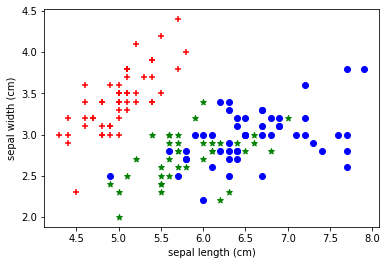

In [45]:
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], marker="+", color="red")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], marker="*", color="green")
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"],  color="blue")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'petal width (cm)')

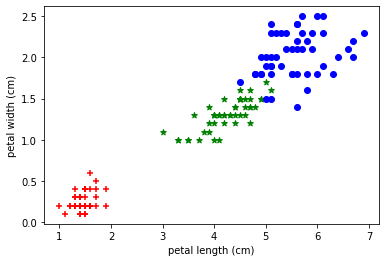

In [46]:
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], marker="+", color="red")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], marker="*", color="green")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"],  color="blue")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [48]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(df.drop(["target","flower_name"], axis=1), df.target, test_size=.2, random_state=10)

**Create KNN (K Neighrest Neighbour Classifier)**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
knn.score(x_test,y_test)

0.9666666666666667

**Plot Confusion Matrix**

In [57]:
y_pred=knn.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

Text(42.0, 0.5, 'Truth')

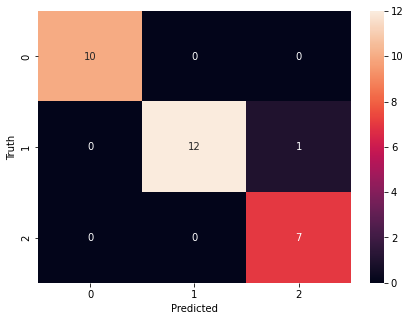

In [62]:
import seaborn as sn

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Print classification report for precesion, recall and f1-score for each classes**

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

